In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset 
df = pd.read_csv('dataset.csv') 


In [6]:
df

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
0,1973,1,Commerical,0.000,0.000,0.000,0.000,0.570,0.000,0.000,0.000,0.570,0.570,0.00,0.000,0.000,0.000
1,1973,1,Electric Power,0.000,0.490,0.000,0.000,0.054,0.157,0.000,0.000,0.211,89.223,0.00,0.000,88.522,0.000
2,1973,1,Industrial,1.040,0.000,0.000,0.000,98.933,0.000,0.000,0.000,98.933,99.973,0.00,0.000,0.000,0.000
3,1973,1,Residential,0.000,0.000,0.000,0.000,30.074,0.000,0.000,0.000,0.000,30.074,0.00,0.000,0.000,0.000
4,1973,1,Transportation,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060,2024,1,Commerical,0.073,1.669,4.267,0.036,7.053,6.233,2.441,0.000,15.728,21.773,0.00,0.000,0.000,0.000
3061,2024,1,Electric Power,0.000,4.667,32.707,119.265,15.071,13.873,0.000,0.000,28.944,257.661,0.00,0.000,72.078,0.000
3062,2024,1,Industrial,0.308,0.356,0.987,0.035,104.878,14.171,1.533,67.742,188.325,190.011,0.00,0.000,0.000,0.000
3063,2024,1,Residential,0.000,3.354,14.897,0.000,34.065,0.000,0.000,0.000,0.000,52.316,0.00,0.000,0.000,0.000


In [7]:
# Overview of data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                3065 non-null   int64  
 1   Month                               3065 non-null   int64  
 2   Sector                              3065 non-null   object 
 3   Hydroelectric Power                 3065 non-null   float64
 4   Geothermal Energy                   3065 non-null   float64
 5   Solar Energy                        3065 non-null   float64
 6   Wind Energy                         3065 non-null   float64
 7   Wood Energy                         3065 non-null   float64
 8   Waste Energy                        3065 non-null   float64
 9   Fuel Ethanol, Excluding Denaturant  3065 non-null   float64
 10  Biomass Losses and Co-products      3065 non-null   float64
 11  Biomass Energy                      3065 no

In [8]:
# Summary statistics for numerical columns
print(df.describe())

              Year        Month  Hydroelectric Power  Geothermal Energy  \
count  3065.000000  3065.000000          3065.000000        3065.000000   
mean   1998.042414     6.491028             0.169759           1.146369   
std      14.747378     3.456934             0.373819           1.550857   
min    1973.000000     1.000000            -0.002000           0.000000   
25%    1985.000000     3.000000             0.000000           0.000000   
50%    1998.000000     6.000000             0.000000           0.357000   
75%    2011.000000     9.000000             0.036000           1.673000   
max    2024.000000    12.000000             2.047000           5.951000   

       Solar Energy  Wind Energy  Wood Energy  Waste Energy  \
count   3065.000000  3065.000000  3065.000000   3065.000000   
mean       2.015008     4.282404    36.644408      5.820124   
std        5.774511    18.124793    46.900639      8.247359   
min        0.000000     0.000000     0.000000      0.000000   
25%      

In [9]:
# Check for missing or duplicate data
print(df.isnull().sum()) 


Year                                  0
Month                                 0
Sector                                0
Hydroelectric Power                   0
Geothermal Energy                     0
Solar Energy                          0
Wind Energy                           0
Wood Energy                           0
Waste Energy                          0
Fuel Ethanol, Excluding Denaturant    0
Biomass Losses and Co-products        0
Biomass Energy                        0
Total Renewable Energy                0
Renewable Diesel Fuel                 0
Other Biofuels                        0
Conventional Hydroelectric Power      0
Biodiesel                             0
dtype: int64


In [10]:
# Count of duplicate rows
print(df.duplicated().sum())  # Count of duplicate rows

0


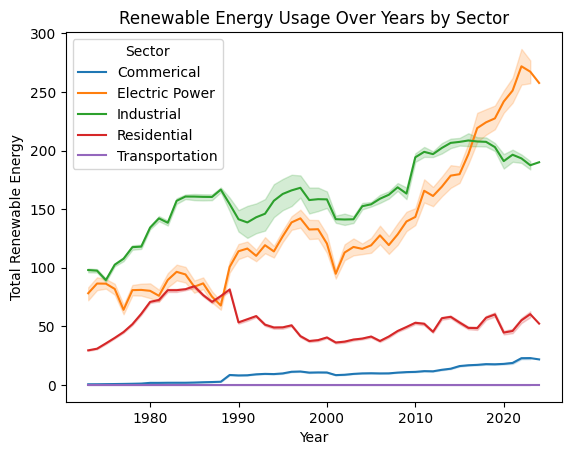

In [11]:
# Visualize renewable energy usage over the years
sns.lineplot(data=df, x='Year', y='Total Renewable Energy', hue='Sector')
plt.title('Renewable Energy Usage Over Years by Sector')
plt.show()



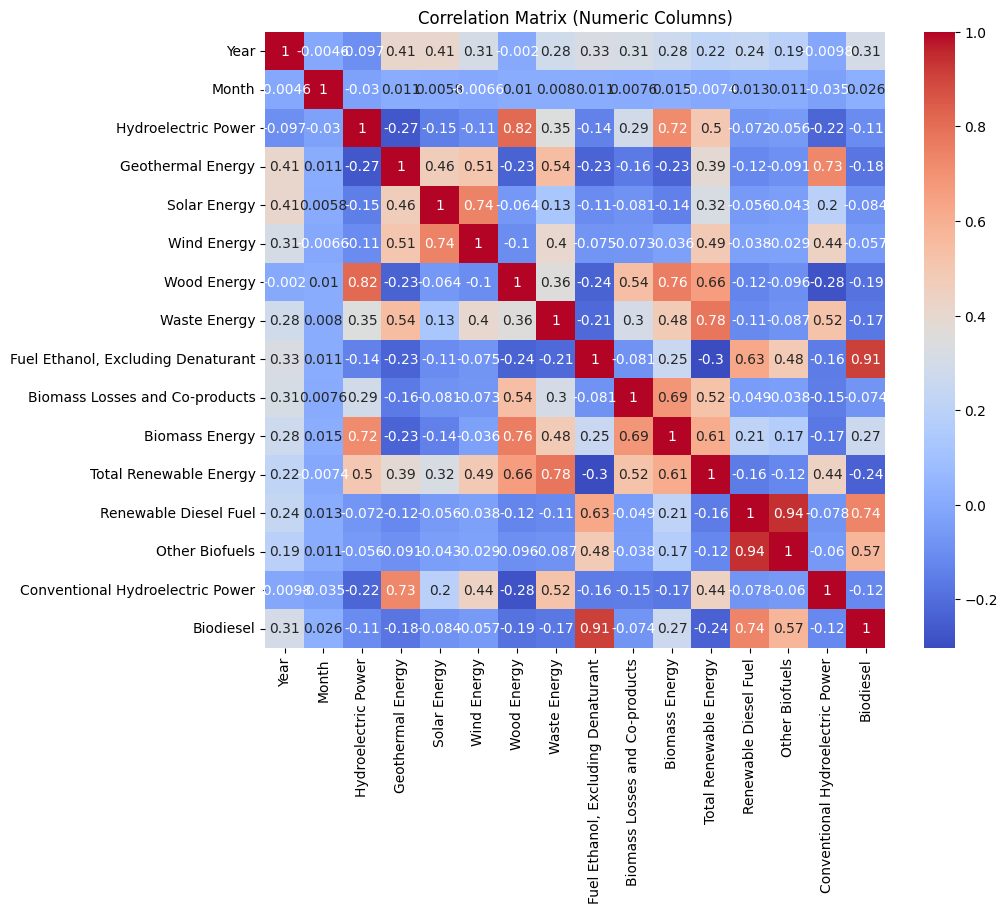

In [12]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Columns)')
plt.show()

 

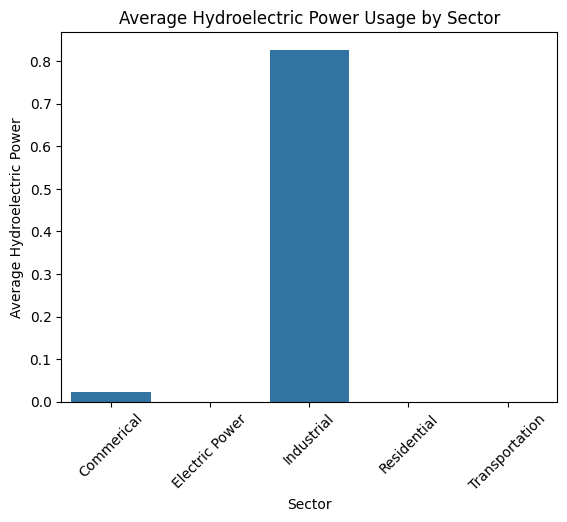

In [13]:
# Bar plot for average Hydroelectric Power usage by sector
avg_hydro_power = df.groupby('Sector')['Hydroelectric Power'].mean().reset_index()

sns.barplot(data=avg_hydro_power, x='Sector', y='Hydroelectric Power')
plt.title('Average Hydroelectric Power Usage by Sector')
plt.xticks(rotation=45)
plt.xlabel('Sector')
plt.ylabel('Average Hydroelectric Power')
plt.show()


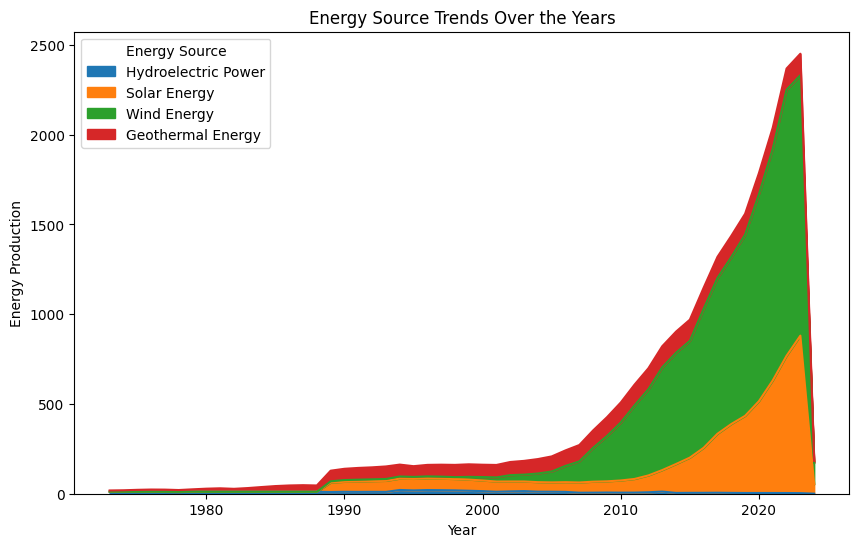

In [14]:
# Area plot for energy sources over years
df_grouped = df.groupby('Year')[['Hydroelectric Power', 'Solar Energy', 'Wind Energy', 'Geothermal Energy']].sum()

df_grouped.plot(kind='area', stacked=True, figsize=(10, 6))
plt.title('Energy Source Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Energy Production')
plt.legend(title='Energy Source')
plt.show()


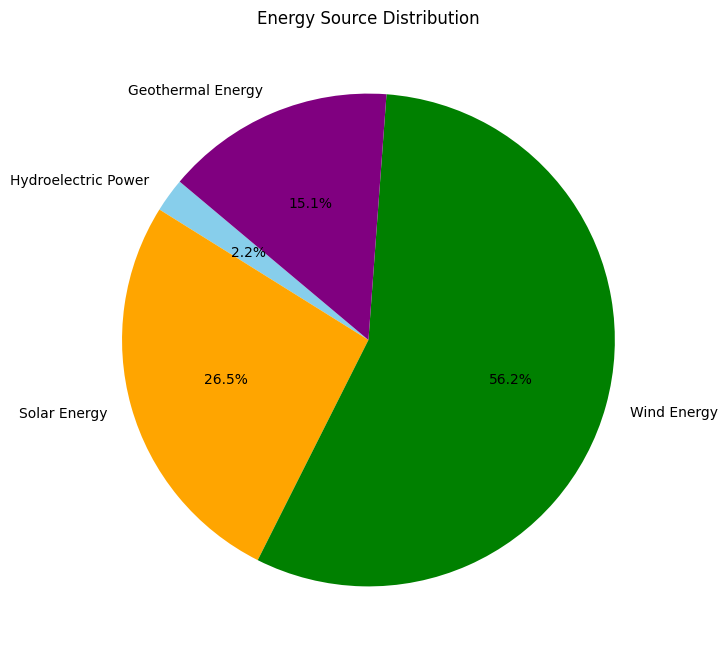

In [15]:
# Pie chart for energy source distribution
energy_sources = ['Hydroelectric Power', 'Solar Energy', 'Wind Energy', 'Geothermal Energy']
energy_sum = df[energy_sources].sum()

plt.figure(figsize=(8, 8))
plt.pie(energy_sum, labels=energy_sources, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'green', 'purple'])
plt.title('Energy Source Distribution')
plt.show()
